## RedCrow Hosting Companies Twitter Data Analysis


#Loading necessary libraries
import pandas as pd
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer,ENGLISH_STOP_WORDS
from nltk import word_tokenize
import re
from langdetect import detect_langs
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.linear_model import LogisticRegression
import nltk
import csv
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
from itertools import islice
from pylab import rcParams
import seaborn as sns
from collections import Counter
from numpy.random import randn
from numpy.random import seed
from numpy import cov
from scipy.stats import pearsonr
import nltk
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import random

In [2]:
#CenterLineBio
#Importing dataset locally and creataing a new dataframe for the sentiment analysis output
data = pd.read_csv("C:/Users/Sameer Kumar/Downloads/CenterlineBio.csv")
COLS = ['date','tweets', 'sentiment','subjectivity','polarity']
df = pd.DataFrame(columns=COLS)

#### Sentiment Analysis

In [3]:
#Sentiment Analysis
for index, row in islice(data.iterrows(), 0, None):

     new_entry = []
     text=(row['tweet'])
     blob = TextBlob(text)
     sentiment = blob.sentiment
     polarity = sentiment.polarity
     subjectivity = sentiment.subjectivity
     new_entry += [row['date'],text,sentiment,subjectivity,polarity]
        
     single_sentiment_df = pd.DataFrame([new_entry], columns=COLS)
     df = df.append(single_sentiment_df, ignore_index=True)
df.to_csv('CenterLineBio_Sentiment_Values.csv', mode='w', columns=COLS, index=False, encoding="utf-8")


In [4]:
#Viewing the sentiment resultls
df.head()

,date,tweets,sentiment,subjectivity,polarity
0,22-04-2020 12:14,Surgical navigation startup wins fourth small ...,"(0.016666666666666663, 0.20000000000000004)",0.2,0.016667
1,18-11-2019 17:08,FDA-cleared 3D Endovascular Guiding System to ...,"(0.0, 0.0)",0.0,0.000000
2,12-11-2019 14:40,Centerline Biomedical's Intra-Operative Positi...,"(0.0, 0.0)",0.0,0.000000
3,22-10-2019 18:40,Centerline Biomedical Announces Philip D. Rack...,"(0.3, 0.4)",0.4,0.300000
4,21-10-2019 19:46,Centerline Biomedical Announces Philip D. Rack...,"(0.3, 0.4)",0.4,0.300000


In [5]:
#Separating date and time columns
df['Dates'] = pd.to_datetime(df['date']).dt.date
df['Time'] = pd.to_datetime(df['date']).dt.time

#Rremoving the original timestamp column
df= df.drop(['date'], axis=1)

In [6]:
df.describe()

,subjectivity,polarity
count,200.000000,200.000000
mean,0.310008,0.139666
std,0.273889,0.256657
min,0.000000,-0.600000
25%,0.000000,0.000000
50%,0.304167,0.012879
75%,0.500000,0.244697
max,1.000000,1.000000


In [7]:
#Since median is 0, which might be coincidental, trying it with only non-zero values in data
dffilter = df.loc[(df.loc[:, df.dtypes != object] != 0).any(1)]

In [8]:
dffilter.describe()

,subjectivity,polarity
count,142.000000,142.000000
mean,0.436630,0.196712
std,0.224038,0.285776
min,0.000000,-0.600000
25%,0.300000,0.000000
50%,0.453701,0.152917
75%,0.544091,0.318182
max,1.000000,1.000000


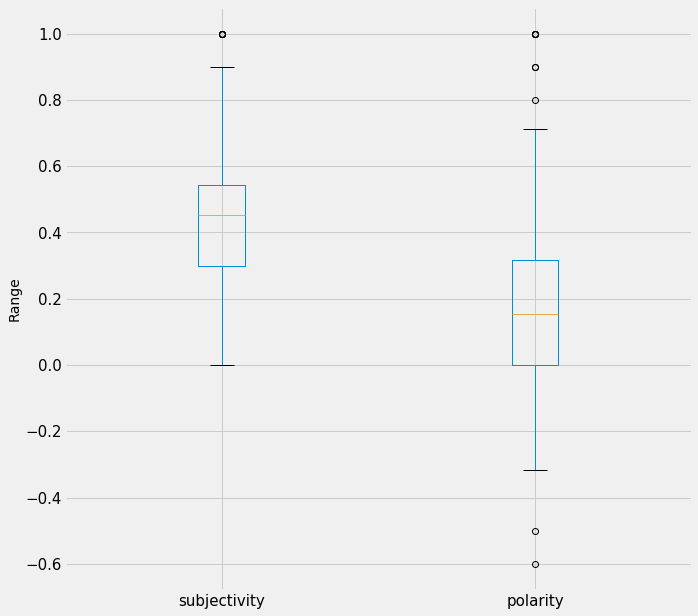

In [9]:
#boxplot for dffilter

boxplot = dffilter.boxplot(column=['subjectivity','polarity'], 
                     fontsize = 15,grid = True, vert=True,figsize=(10,10,))
plt.ylabel('Range')
plt.show()

In [10]:
#covariance and correlation for dffilter
# calculate the covariance between two variables

# prepare data
data1 = dffilter['subjectivity']
data2 = data1 + dffilter['polarity']
# calculate covariance matrix
covariance = cov(data1, data2) 
print(covariance)

corr, _ = pearsonr(data1, data2)
print('Pearsons correlation: %.5f' % corr)

[[0.05019305 0.08197422]
 [0.08197422 0.19542354]]
Pearsons correlation: 0.82769


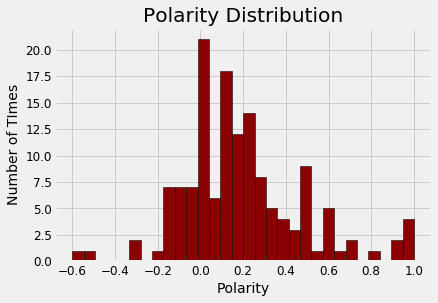

In [11]:
#Polarity Distribution for dffilter

plt.hist(dffilter['polarity'], color = 'darkred', edgecolor = 'black', density=False,
         bins = int(30))
plt.title('Polarity Distribution')
plt.xlabel("Polarity")
plt.ylabel("Number of TImes")

from pylab import rcParams
rcParams['figure.figsize'] = 10,15

plt.show()

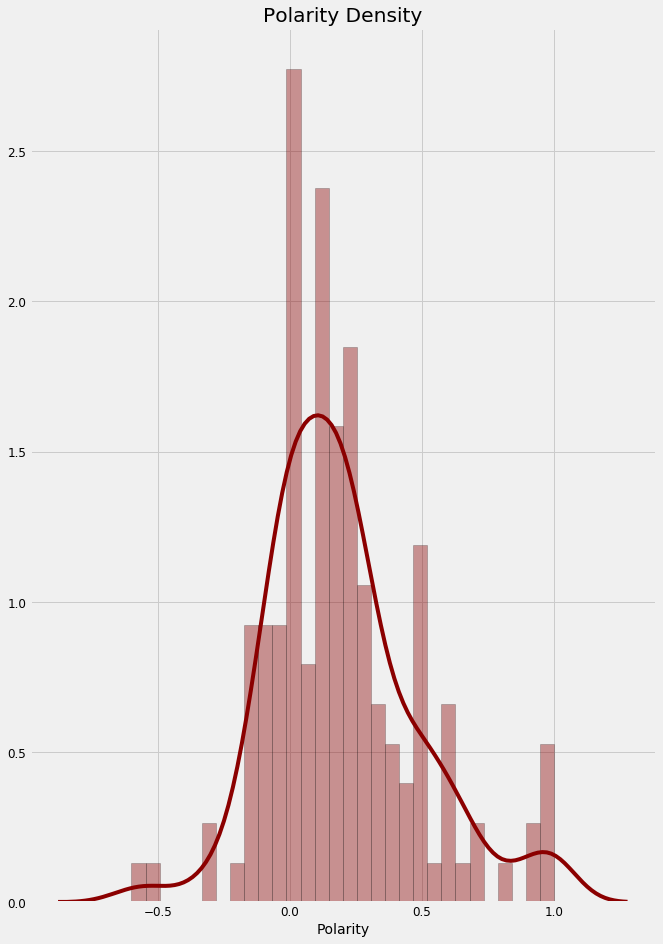

In [12]:
#Polarity Density for dffilter
sns.distplot(dffilter['polarity'], hist=True, kde=True, 
             bins=int(30), color = 'darkred',
             hist_kws={'edgecolor':'black'},axlabel ='Polarity')
plt.title('Polarity Density')

rcParams['figure.figsize'] = 10,15

plt.show()

#### NLP Cleaning and Visualization

In [13]:
#NLP Package
#nltk.download()
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Sameer
[nltk_data]     Kumar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [17]:
wt = [word_tokenize(tweet) for tweet in dffilter.tweets] #tokenisation

In [18]:
len_tokens = [] #token count in each item of word_tokens
for i in range(len(wt)):
    len_tokens.append(len(wt[i]))

In [19]:
dffilter['n_tokens'] = len_tokens

In [21]:
#Tokenization
wt = [word_tokenize(tweet) for tweet in dffilter.tweets] #tokenisation
print('original tokens:', wt[0])
cleaned_tokens = [[word for word in item if word.isalpha()] for item in wt]
print('cleaned tokens:', cleaned_tokens)

original tokens: ['Surgical', 'navigation', 'startup', 'wins', 'fourth', 'small', 'business', 'award', 'from', 'NIH', "'s", 'National', 'Heart', ',', 'Lung', ',', 'and', 'Blood', 'Institute', 'to', 'extend', 'novel', 'technology', 'to', 'address', 'peripheral', 'vascular', 'disease', 'https', ':', '//t.co/y6MMqBguWQ']
cleaned tokens: [['Surgical', 'navigation', 'startup', 'wins', 'fourth', 'small', 'business', 'award', 'from', 'NIH', 'National', 'Heart', 'Lung', 'and', 'Blood', 'Institute', 'to', 'extend', 'novel', 'technology', 'to', 'address', 'peripheral', 'vascular', 'disease', 'https'], ['Centerline', 'Biomedical', 'Announces', 'Philip', 'Rackliffe', 'MBA', 'as', 'Chief', 'Executive', 'Officer', 'CEO', 'Effective', 'October', 'https'], ['Centerline', 'Biomedical', 'Announces', 'Philip', 'Rackliffe', 'MBA', 'as', 'Chief', 'Executive', 'Officer', 'CEO', 'Effective', 'October', 'https', 'https'], ['Ohio', 'is', 'full', 'of', 'innovative', 'startups', 'that', 'are', 'changing', 'the',

In [22]:
#Removing Special Characters
spec_chars = ["!",'"',"#","%","&","'","(",")",
              "*","+",",","-",".","/",":",";","<",
              "=",">","?","@","[","\\","]","^","_",
              "`","{","|","}","~","–"]
for char in spec_chars:
    dffilter['tweets'] = dffilter['tweets'].str.replace(char, ' ')

In [23]:
#Stemming
porter = PorterStemmer()
WNlemmatizer = WordNetLemmatizer()
tokens = [word_tokenize(tweet) for tweet in dffilter.tweets]
stemmed_tokens = [[porter.stem(word) for word in tweet] for tweet in tokens]
stemmed_tokens

[['surgic',
  'navig',
  'startup',
  'win',
  'fourth',
  'small',
  'busi',
  'award',
  'from',
  'nih',
  's',
  'nation',
  'heart',
  'lung',
  'and',
  'blood',
  'institut',
  'to',
  'extend',
  'novel',
  'technolog',
  'to',
  'address',
  'peripher',
  'vascular',
  'diseas',
  'http',
  't',
  'co',
  'y6mmqbguwq'],
 ['centerlin',
  'biomed',
  'announc',
  'philip',
  'D',
  'rackliff',
  'mba',
  'as',
  'chief',
  'execut',
  'offic',
  'ceo',
  'effect',
  'octob',
  '21st',
  '2019',
  'http',
  't',
  'co',
  'tt0rxhazjr'],
 ['centerlin',
  'biomed',
  'announc',
  'philip',
  'D',
  'rackliff',
  'mba',
  'as',
  'chief',
  'execut',
  'offic',
  'ceo',
  'effect',
  'octob',
  '21st',
  '2019',
  'http',
  't',
  'co',
  'afadozajvi',
  'http',
  't',
  'co',
  'gyvrxcyah'],
 ['ohio',
  'is',
  'full',
  'of',
  'innov',
  'startup',
  'that',
  'are',
  'chang',
  'the',
  'face',
  'of',
  'biotech',
  '😎',
  'check',
  'out',
  'how',
  'engin',
  'turn',
  'exe

In [24]:
stopwords = nltk.corpus.stopwords.words('english')

In [25]:
#Creating Top Used Words Excluding Stopwrods
RE_stopwords = r'\b(?:{})\b'.format('|'.join(stopwords))
words = (df.tweets
           .str.lower()
           .replace([r'\|',r'\&',r'\-',r'\.',r'\,',r'\'', RE_stopwords], [' ', '','','','','',''], regex=True)
           .str.cat(sep=' ')
           .split()
)

In [26]:
# generate DF out of Counter
rslt = pd.DataFrame(Counter(words).most_common(10),
                    columns=['Word', 'Frequency']).set_index('Word')
rslt

,Frequency
Word,
technology,23
radiation,23
@centerlinebio,21
medical,20
new,19
iops,18
learn,17
centerline,15
study,15


In [43]:
#Updated Stopwords
stopwords = set(STOPWORDS)
stopwords.update(["up", "of", "in", "for", "https","co", "new", "centerline"])

RE_stopwords = r'\b(?:{})\b'.format('|'.join(stopwords))
words = (df.tweets
           .str.lower()
           .replace([r'\|',r'\&',r'\-',r'\.',r'\,',r'\'', RE_stopwords], [' ', '','','','','',''], regex=True)
           .str.cat(sep=' ')
           .split()
)

# generate DF out of Counter
rslt = pd.DataFrame(Counter(words).most_common(10),
                    columns=['Word', 'Frequency']).set_index('Word')
rslt

,Frequency
Word,
technology,23
radiation,23
@centerlinebio,21
medical,20
iops,18
learn,17
study,15
risk,15
patients,15


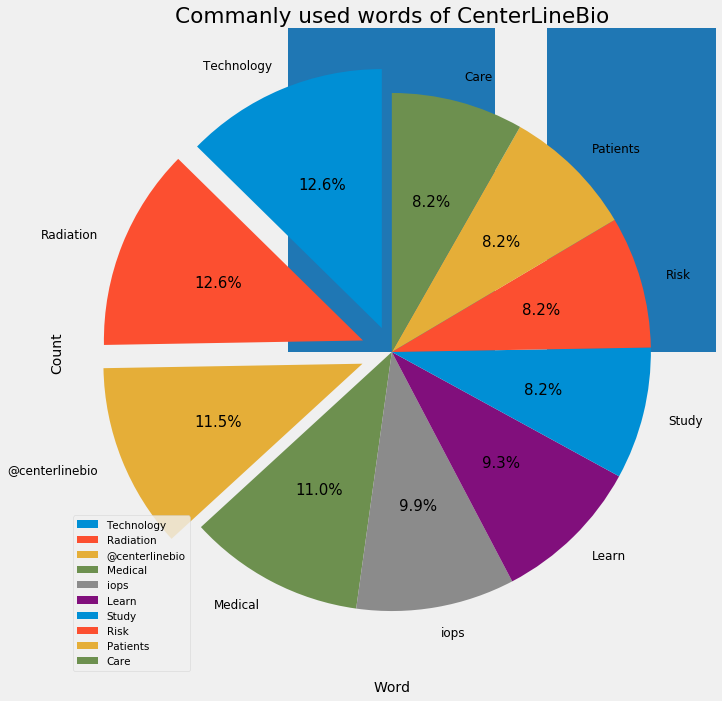

In [48]:
#Generating Pie Chart of Commanly Used Words
rslt_wordcloud = pd.DataFrame(Counter(words).most_common(100),
                    columns=['Word', 'Frequency'])
#BAR CHART
rslt.plot.bar(rot=40, figsize=(16,10), width=0.8,colormap='tab10')
plt.title("Commanly used words of CenterLineBio")
plt.ylabel("Count")

from pylab import rcParams
rcParams['figure.figsize'] = 10,15

#PIE CHART

explode = (0.1, 0.12, 0.122, 0,0,0,0,0,0,0)  # explode 1st slice
labels=['Technology',
        'Radiation',
        '@centerlinebio',
        'Medical',
        'iops',
        'Learn',
        'Study',
        'Risk',
        'Patients',
         'Care']

plt.pie(rslt['Frequency'], explode=explode,labels =labels , autopct='%1.1f%%',
        shadow=False, startangle=90)
plt.legend( labels, loc='lower left',fontsize='x-small',markerfirst = True)
plt.tight_layout()
plt.title('Commanly used words of CenterLineBio')
plt.show()

import matplotlib as mpl
mpl.rcParams['font.size'] = 15.0

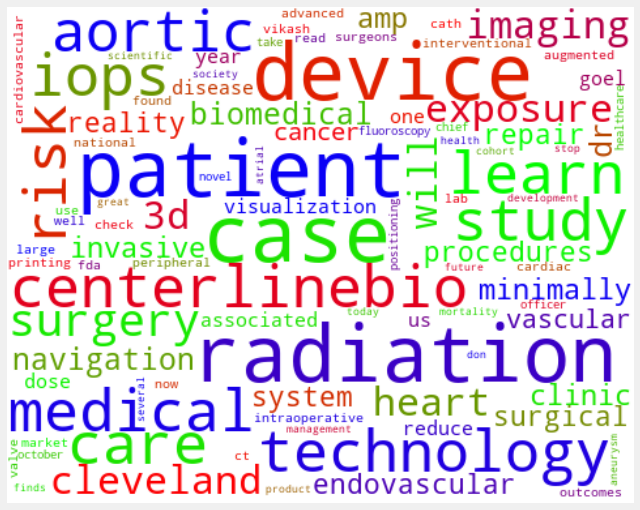

<Figure size 720x720 with 0 Axes>

In [45]:
#Generating Wordcloud
wordcloud = WordCloud(max_font_size=60, max_words=100, width=480, height=380,colormap="brg",
                      background_color="white").generate(' '.join(rslt_wordcloud['Word']))
                      
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.figure(figsize=[10,10])
plt.show()

#### Time Series Forecasting

In [52]:
#Creating dataframe of polarity and dates only
cols = dffilter[['polarity', 'Dates']]
new = cols.copy()
new.head()

,polarity,Dates
0,0.016667,2020-04-22
3,0.300000,2019-10-22
4,0.300000,2019-10-21
5,0.487500,2019-02-10
6,0.625000,2019-09-20


In [54]:
#Setting date as index
new = new.groupby('Dates')['polarity'].sum().reset_index()
datetime_index = pd.DatetimeIndex(new['Dates'].values)
new = new.set_index(datetime_index)

In [55]:
#Dropping the existing Dates column
new = new.drop(['Dates'], axis = 1)
new.index

DatetimeIndex(['2017-01-12', '2017-04-12', '2017-06-12', '2017-08-11',
               '2017-10-24', '2017-10-25', '2017-11-12', '2017-11-13',
               '2017-11-17', '2017-11-22',
               ...
               '2019-09-01', '2019-09-09', '2019-09-20', '2019-10-05',
               '2019-10-06', '2019-10-21', '2019-10-22', '2019-11-06',
               '2019-12-09', '2020-04-22'],
              dtype='datetime64[ns]', length=132, freq=None)

In [56]:
new.head()

,polarity
2017-01-12,-0.200000
2017-04-12,-0.031818
2017-06-12,0.375000
2017-08-11,0.250000
2017-10-24,0.318182


In [58]:
y = new['polarity'].resample('MS').mean()

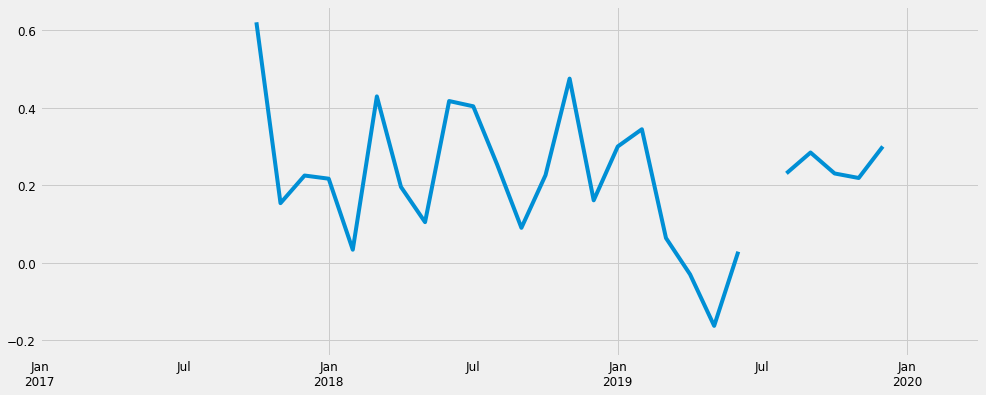

In [59]:
y.plot(figsize=(15, 6))
plt.show()

In [60]:
#ARIMA Model
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [61]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
#mod = sm.tsa.statespace.SARIMAX(y,order=(1, 1, 1),seasonal_order=(1, 1, 0, 12),enforce_stationarity=False,enforce_invertibility=False)
            results = mod.fit()
#print(results.summary().tables[1])
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:9.057257273315022
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:3.581754510441261
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:78.42576364722755
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1.3480635500795062


C:\Users\Sameer Kumar\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:6.448226733905638
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:14.219089451516503
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1.9464356225103678
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:4.720403346521537
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:-3.174841910474454
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:-8.404812208487499
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:64.75065843494286
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:-0.9897156665818123


C:\Users\Sameer Kumar\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Sameer Kumar\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:-4.607087098477626
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2.810267390427777
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:3.1567917147074986
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1.0172749683699127
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:-4.5421065455962335
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:-5.892813392701839
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:75.81437038544047
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:7.827811955248399
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:-9.3972433175197
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:-4.9974934896166
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:8.116350802591484
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:9.730130001749014
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:2.7607210244822165
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:-10.609957038163834
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:52.55689735473633
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:1.1673631406306733
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:-10.316084156913746
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:-8.717325256158144

C:\Users\Sameer Kumar\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:-6.147171170154051


C:\Users\Sameer Kumar\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:7.1030659299804215
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:10.084024722951774
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:3.9733891595972004
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:-11.259037531338492
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:54.46649329659774
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:0.29231153277195077
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:-7.266938600388329


C:\Users\Sameer Kumar\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:-6.604443158463649
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:7.659007918105695
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:2.4127678000582993


In [62]:
#ARIMA Summary
mod = sm.tsa.statespace.SARIMAX(y,order=(1, 1, 1),seasonal_order=(1, 1, 0, 12),enforce_stationarity=False,enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0007      0.269      0.003      0.998      -0.527       0.528
ma.L1         -1.0000      0.002   -472.628      0.000      -1.004      -0.996
ar.S.L12       0.0001      0.006      0.017      0.986      -0.011       0.012
sigma2         0.0505      0.042      1.207      0.228      -0.032       0.133


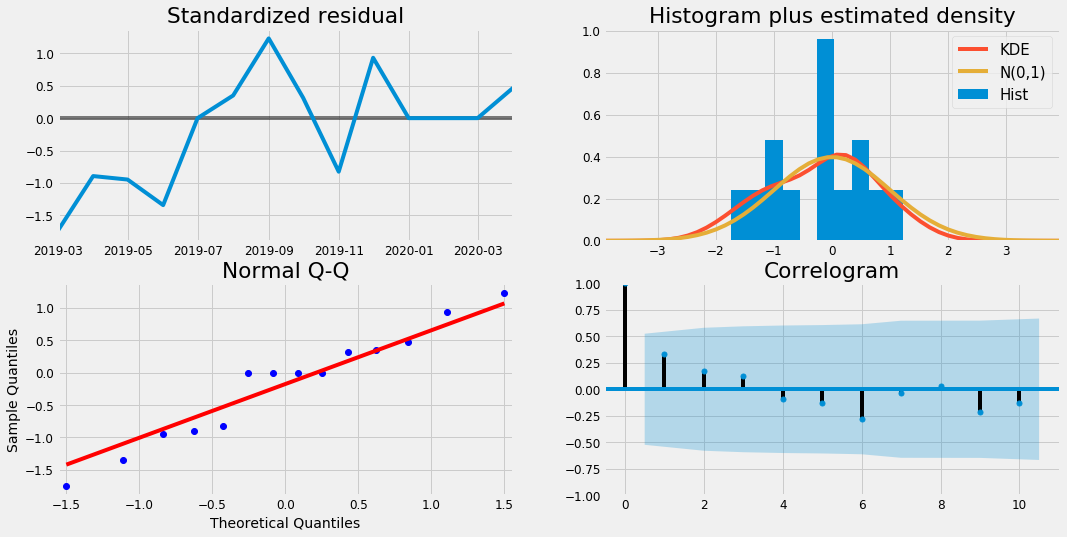

In [63]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

In [68]:
#Calculating Mean Square Error and Root Mean Square Error
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error of our forecasts is 0.07
The Root Mean Squared Error of our forecasts is 0.27


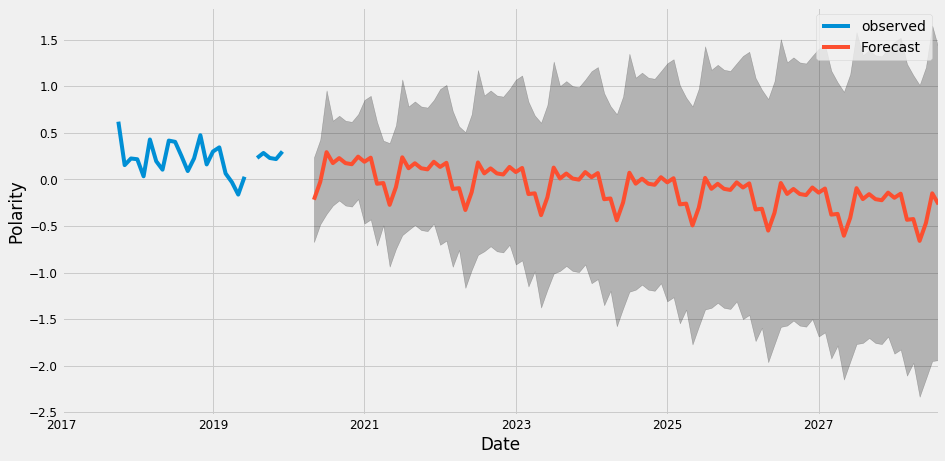

In [69]:
#Forecasting Model
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Polarity')
plt.legend()
plt.show()